# Analisi della Diffusione del COVID-19

Il presente report ha l’obiettivo di analizzare la diffusione del COVID-19 e l’andamento delle vaccinazioni a livello globale, con particolare attenzione a specifiche aree geografiche.  
A tal fine, è stato utilizzato il dataset messo a disposizione da *Our World in Data*, accessibile al seguente indirizzo:  
[https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data)

In particolare, è stato scaricato il file completo disponibile alla voce **“Download our complete COVID-19 dataset”**, nel formato più adatto all’analisi.

In [4]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## **TASK 1. Dimensioni del Dataset e Metadati**

Il dataset contiene un ampio insieme di informazioni relative all’evoluzione della pandemia da COVID-19 nel mondo.  
Include dati su casi, decessi, vaccinazioni, test e altri indicatori sanitari, accompagnati da metadati relativi a Paesi, date e variabili epidemiologiche.

In [8]:
covid_df = pd.read_csv('owid-covid-data.csv')

# stampa dello shape del dataset per verificare il numero di righe e di colonne
print(f'\033[01mDimensioni del dataset (righe, colonne) --> {covid_df.shape}\033[0m\n')

# 5 righe casuali
display(covid_df.sample(5))

Dimensioni del dataset (righe, colonne) --> (429435, 67)



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
13179,AIA,North America,Anguilla,2024-01-05,3904.0,0.0,0.000,12.0,0.0,0.000,...,NaN,NaN,NaN,81.88,NaN,15877,NaN,NaN,NaN,NaN
175265,IDN,Asia,Indonesia,2020-02-08,0.0,0.0,0.000,0.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,275501344,NaN,NaN,NaN,NaN
119048,OWID_EUR,NaN,Europe,2021-04-28,43584704.0,0.0,148249.143,1040454.0,0.0,3250.857,...,NaN,NaN,NaN,NaN,NaN,744807803,NaN,NaN,NaN,NaN
384138,TKL,Oceania,Tokelau,2022-02-18,0.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,81.86,NaN,1893,NaN,NaN,NaN,NaN
81354,COK,Oceania,Cook Islands,2022-09-19,6389.0,0.0,0.429,1.0,0.0,0.000,...,NaN,NaN,NaN,76.25,NaN,17032,NaN,NaN,NaN,NaN


In [11]:
# Recupera e stampa i metadati del dataset COVID-19 da Our World in Data
try:
    dataset_readme = requests.get('https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/README.md').text
except:
    dataset_readme = meta_info = ''
    
print("METADATI:")
for meta in sorted(covid_df.columns.values):
    if dataset_readme:
        meta_info = dataset_readme[dataset_readme.index(f'`{meta}`'):]
        meta_info = meta_info[meta_info.index('|') + 1:]
        meta_info = ' -->' + meta_info[:meta_info.index('|') - 1]

    print('-'*len(meta))
    print(f'{meta}{meta_info}')

METADATI:
-------------
aged_65_older --> Share of the population that is 65 years and older, most recent year available                                                                                                                                                            
-------------
aged_70_older --> Share of the population that is 70 years and older in 2015                                                                                                                                                                                
---------------------
cardiovasc_death_rate --> Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)                                                                                                                                               
---------
continent --> Continent of the geographical location                                                                                                               

## **TASK 2. Si chiede di trovare, per ogni continente:**
### ***a. il numero dei casi fin dall'inizio della pandemia.***

In [16]:
# check dei valori nella colonna 'continent'
covid_df.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [19]:
# Somma dei nuovi casi per ciascun continente 
tot_casi_per_continente = covid_df.groupby('continent')['new_cases'].sum()

print("\033[1mNumero totale di nuovi casi per continente dall'inizio della pandemia:\033[0m")
print(tot_casi_per_continente.astype(int).to_string())

Numero totale di nuovi casi per continente dall'inizio della pandemia:
continent
Africa            13146831
Asia             301564180
Europe           252916868
North America    124492698
Oceania           15003468
South America     68811012


In [22]:
# check dei valori della colonna 'location' in corrispondenza per i valori nulli di 'continent'
covid_df[ covid_df.continent.isna() == True ].location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries', 'World'],
      dtype=object)

In [25]:
# raggruppamento con aggregazione 'somma' su new_cases per i valori 'nan' di 'continent'
cont_nan_loc = covid_df[ covid_df.continent.isna() == True ].groupby('location').new_cases.sum()
cont_nan_loc.astype(int)

location
Africa                            13146831
Asia                             301564180
Europe                           252916868
European Union (27)              185822587
High-income countries            429044052
Low-income countries               1944687
Lower-middle-income countries     92019711
North America                    124492698
Oceania                           15003468
South America                     68811012
Upper-middle-income countries    251756125
World                            775935057
Name: new_cases, dtype: int32

In [28]:
print(f'\033[01mAnalisi raggruppamento \'continent\' uguale a \'nan\':\033[0m')
print(f' - totale per i valori di \'location\' uguali a \'world\':\t\t {cont_nan_loc.iloc[-1]:.0f}')
print(f' - totale per i valori di \'location\' nella colonna \'continent\':\t {cont_nan_loc[tot_casi_per_continente.index].sum():.0f}')
print(f'\033[01mSomma dei casi per continente (visti in precedenza):\033[0m\t\t {tot_casi_per_continente.sum():.0f}')

Analisi raggruppamento 'continent' uguale a 'nan':
 - totale per i valori di 'location' uguali a 'world':		 775935057
 - totale per i valori di 'location' nella colonna 'continent':	 775935057
Somma dei casi per continente (visti in precedenza):		 775935057


**Osservando i valori, si nota che i totali coincidono, suggerendo che i record con valore `nan` nella colonna 'continent' rappresentano probabilmente dati aggregati o raccolti in modo differente rispetto al resto del dataset.**

Percentuale dei casi totali nel mondo divisi per continente:
continent
Africa            1.69 %
Asia             38.86 %
Europe            32.6 %
North America    16.04 %
Oceania           1.93 %
South America     8.87 %


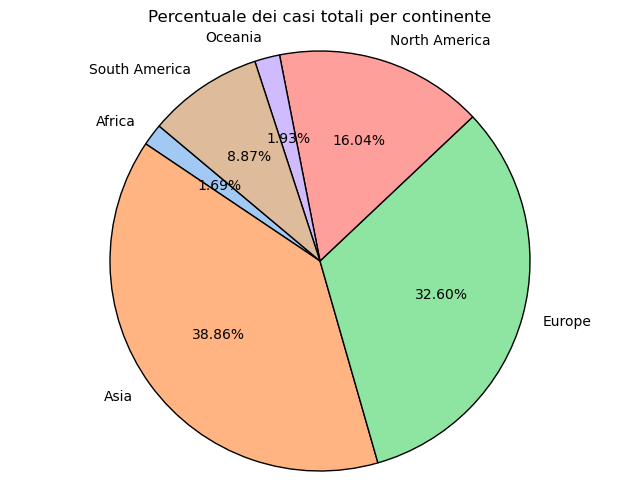

In [33]:
# Raggruppamento per continente con somma dei nuovi casi
tot_casi_per_continente = covid_df.groupby('continent')['new_cases'].sum()

# Calcolo la percentuale dei casi per ogni continente
percent_cases_continent = (tot_casi_per_continente / tot_casi_per_continente.sum()) * 100

print('\033[01mPercentuale dei casi totali nel mondo divisi per continente:\033[0m')
print((percent_cases_continent.round(2).astype(str) + ' %').to_string())

# Grafico a torta
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:len(percent_cases_continent)]

plt.pie(percent_cases_continent, labels=percent_cases_continent.index, autopct='%.2f%%',
        colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Percentuale dei casi totali per continente')
plt.axis('equal')  
plt.show()

## **TASK 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:**
### ***a. l'evoluzione dei casi totali dall'inizio alla fine dell'anno.***

In [38]:
# check valori nulli sulle date
covid_df.date.isna().value_counts()

date
False    429435
Name: count, dtype: int64

In [41]:
# conversione colonna 'date' in datetime
covid_df.date = pd.to_datetime(covid_df.date)

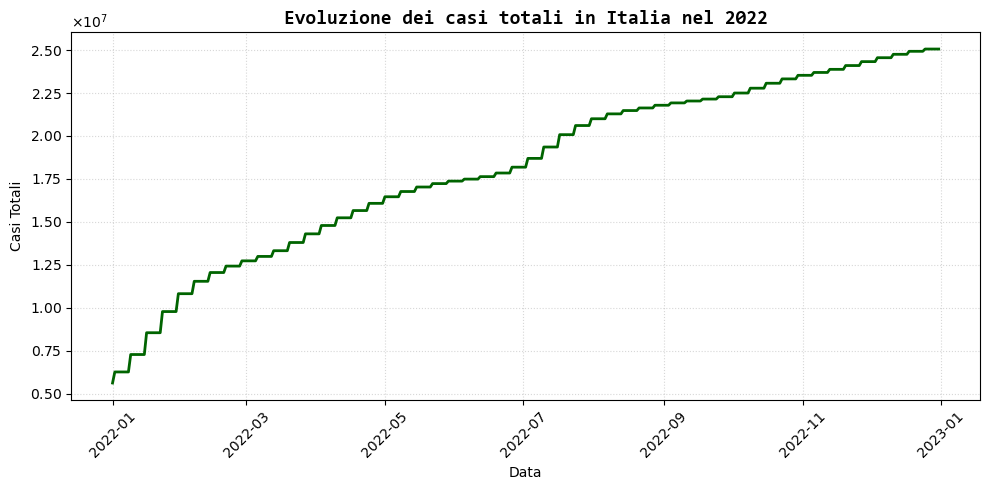

In [44]:
# Filtri per data = 2022 e location = Italy
date_flt = covid_df.date.dt.year == 2022
italy_flt = covid_df.location == 'Italy'
df_italy_2022 = covid_df[date_flt & italy_flt].copy()

# Plot lineare
plt.figure(figsize=(10, 5))
plt.plot(df_italy_2022['date'], df_italy_2022['total_cases'],
         color='darkgreen', linewidth=2)

# Titolo e assi
plt.title('Evoluzione dei casi totali in Italia nel 2022', fontsize=14, fontweight='bold', fontname='Consolas')
plt.xlabel('Data')
plt.ylabel('Casi Totali')

import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

## ***b.il numero di nuovi casi rispetto alla data.***

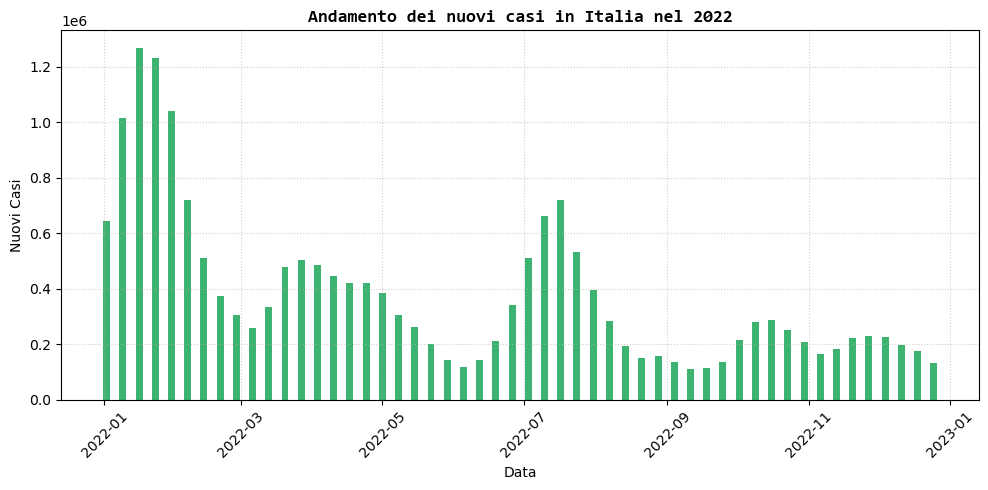

In [50]:
# Filtri per l'Italia e l'anno 2022
date_flt = covid_df['date'].dt.year == 2022
italy_flt = covid_df['location'] == 'Italy'

# Rimozione dei giorni con nuovi casi = 0 o nulli
df_italy_2022 = covid_df[date_flt & italy_flt].copy()
df_italy_2022 = df_italy_2022[df_italy_2022['new_cases'].notna() & (df_italy_2022['new_cases'] != 0)]

# Plot a barre
plt.figure(figsize=(10, 5))
plt.bar(df_italy_2022['date'], df_italy_2022['new_cases'], color='mediumseagreen', width=3)

plt.title('Andamento dei nuovi casi in Italia nel 2022', fontsize=13, fontweight='bold', fontname='Consolas')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

## **TASK 4. Riguardo le nazioni Italia, Germania e Francia:**

### ***a.mostrare in un boxplot la differenzaa tra wueste nazioni riguardo il numero di pazienti in terapia intensiva (ICU) da Maggio 2022 ad Aprile 2023 inclusi.***

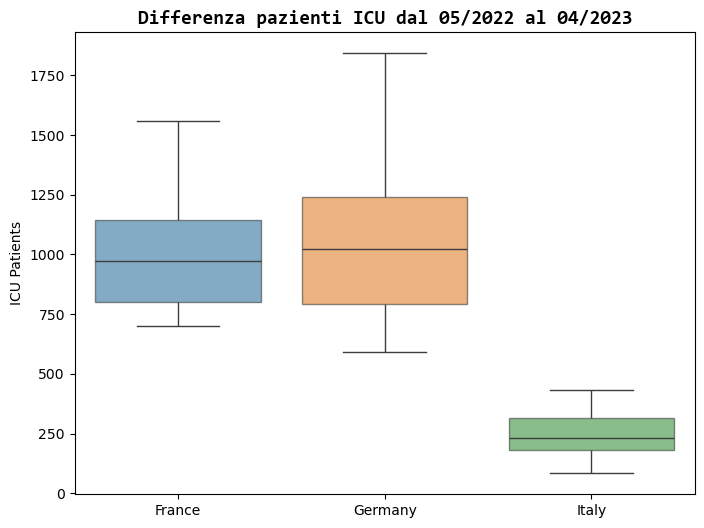

In [55]:
# Filtri per date dal 01/05/2022 al 01/04/2023
start_date = pd.to_datetime("2022-05-01")
end_date = pd.to_datetime("2023-04-01")
date_filter = (covid_df['date'] >= start_date) & (covid_df['date'] <= end_date)

# Filtro per le nazioni: Italy, Germany, France
location_filter = covid_df['location'].str.contains('Italy|Germany|France')

# Seleziono i dati filtrati
df_filtered = covid_df[date_filter & location_filter]

# boxplot
plt.figure(figsize=(8,6))
plt.title('Differenza pazienti ICU dal 05/2022 al 04/2023', fontsize=14, fontweight='bold', fontname='Consolas')

sns.boxplot(data=df_filtered, x='location', y='icu_patients', hue='location', boxprops={'alpha':0.6})

plt.xlabel('')
plt.ylabel('ICU Patients')

plt.show()

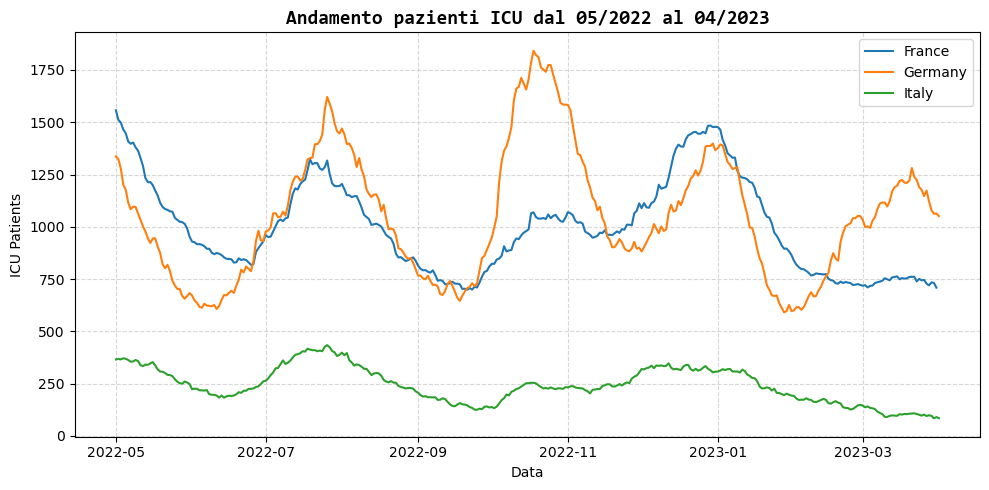

In [58]:
loc_flt = covid_df.location.str.contains('Italy|Germany|France')
start_date = pd.to_datetime("2022-05-01")
end_date = pd.to_datetime("2023-04-01")
date_flt = (covid_df.date >= start_date) & (covid_df.date <= end_date)

# Dataframe filtrato
df_filtered = covid_df[loc_flt & date_flt]

# Plot lineplot andamento ICU Patients nel tempo
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_filtered, x='date', y='icu_patients', hue='location')
plt.title('Andamento pazienti ICU dal 05/2022 al 04/2023', fontsize=14, fontweight='bold', fontname='Consolas')
plt.xlabel('Data')
plt.ylabel('ICU Patients')
plt.legend(title='')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### ***Considerazioni: l’analisi del boxplot suggerisce quindi che, in questo intervallo, l’impatto della pandemia in termini di ricoveri in terapia intensiva è stato più contenuto in Italia rispetto agli altri due paesi. Dato confermato dal succesivo lineplot.*** ###

## **TASK 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:** ##
### ***a.mostrare la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)*** ###

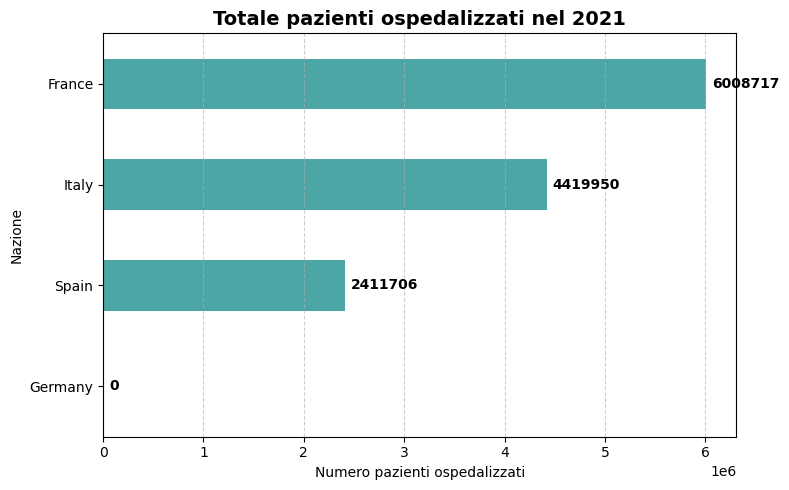

In [67]:
# Filtri per anno 2021 e nazioni
date_flt = covid_df['date'].dt.year == 2021
loc_flt = covid_df['location'].str.contains('Italy|Germany|France|Spain')

# Calcolo totali ospedalizzati per paese
tot_hosp = covid_df.loc[loc_flt & date_flt].groupby('location')['hosp_patients'].sum().astype(int)

# Grafico a barre orizzontali
plt.figure(figsize=(8,5))
tot_hosp.sort_values().plot(kind='barh', color='teal', alpha=0.7)

plt.title('Totale pazienti ospedalizzati nel 2021', fontsize=14, fontweight='bold')
plt.xlabel('Numero pazienti ospedalizzati')
plt.ylabel('Nazione')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for index, value in enumerate(tot_hosp.sort_values()):
    plt.text(value + max(tot_hosp)*0.01, index, str(value), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### ***Per la Germania non sono roportati i pazienti giornalieri ospedalizzati hosp_patients, quindi non è possibile sostituire i dati mancanti. In alternativa, per fare un'analisi sulle ospedalizzazioni per le suddette nazioni,si può analizzare la colonna weekly_hosp_admissions che mostra le ospedalizzazioni settimanali.*** ###

Ammissioni ospedaliere settimanali (totale per nazione):
location
France     2262365
Germany    1826264
Italy      1652358
Spain      2068304


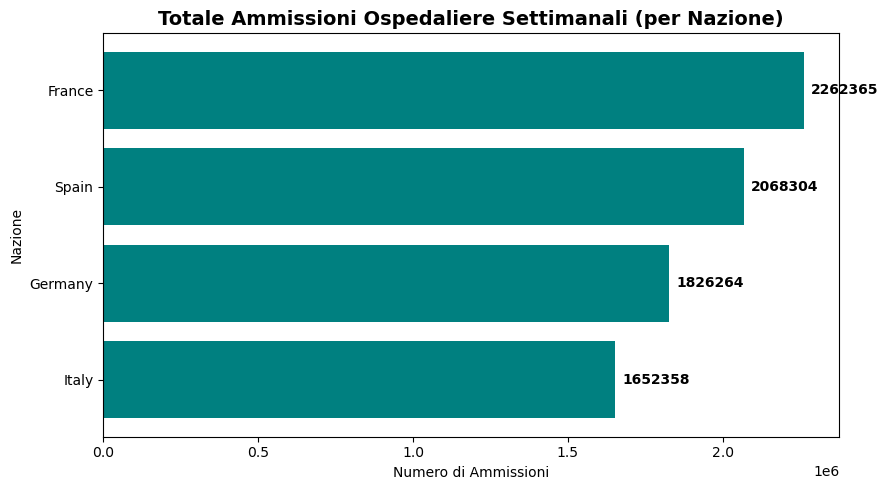

In [72]:
# Totale delle ammissioni ospedaliere settimanali per ogni nazione selezionata
print('\033[1mAmmissioni ospedaliere settimanali (totale per nazione):\033[0m')
admissions_summary = covid_df[loc_flt & date_flt].groupby('location')['weekly_hosp_admissions'].sum().astype(int)
print(admissions_summary.to_string())

# Ordinamento decrescente
totals = admissions_summary.sort_values(ascending=True)

plt.figure(figsize=(9, 5))
bars = plt.barh(totals.index, totals.values, color='teal')

for i, value in enumerate(totals.values):
    plt.text(value + max(totals.values)*0.01, i, str(value), va='center', fontweight='bold', fontsize=10)

plt.title('Totale Ammissioni Ospedaliere Settimanali (per Nazione)', fontsize=14, fontweight='bold')
plt.xlabel('Numero di Ammissioni')
plt.ylabel('Nazione')
plt.tight_layout()
plt.show()